# Generating image using the fine-tuned StableDiffusion XL model with DreamBooth

This notebook uses a deployed StableDiffusion XL model, which has already been fine-tuned using DreamBooth, to generate toy-jensen image.

### Call the model infernece endpoint

To generate the image using the deployed model, we will need to invoke the deployed model's inference endpoint.

# Imports needed to perform the REST call and show the image

In [1]:
import requests
import base64
from io import BytesIO
from PIL import Image

In [2]:
# Declare the inference endpoint
inference_endpoint = 'https://nvidia-fine-tuned-sgahlot-nvidia.apps.ai-dev01.kni.syseng.devcluster.openshift.com'
predict_endpoint = inference_endpoint + '/v1/models/model:predict'

/opt/app-root/lib64/python3.9/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'nvidia-fine-tuned-sgahlot-nvidia.apps.ai-dev01.kni.syseng.devcluster.openshift.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


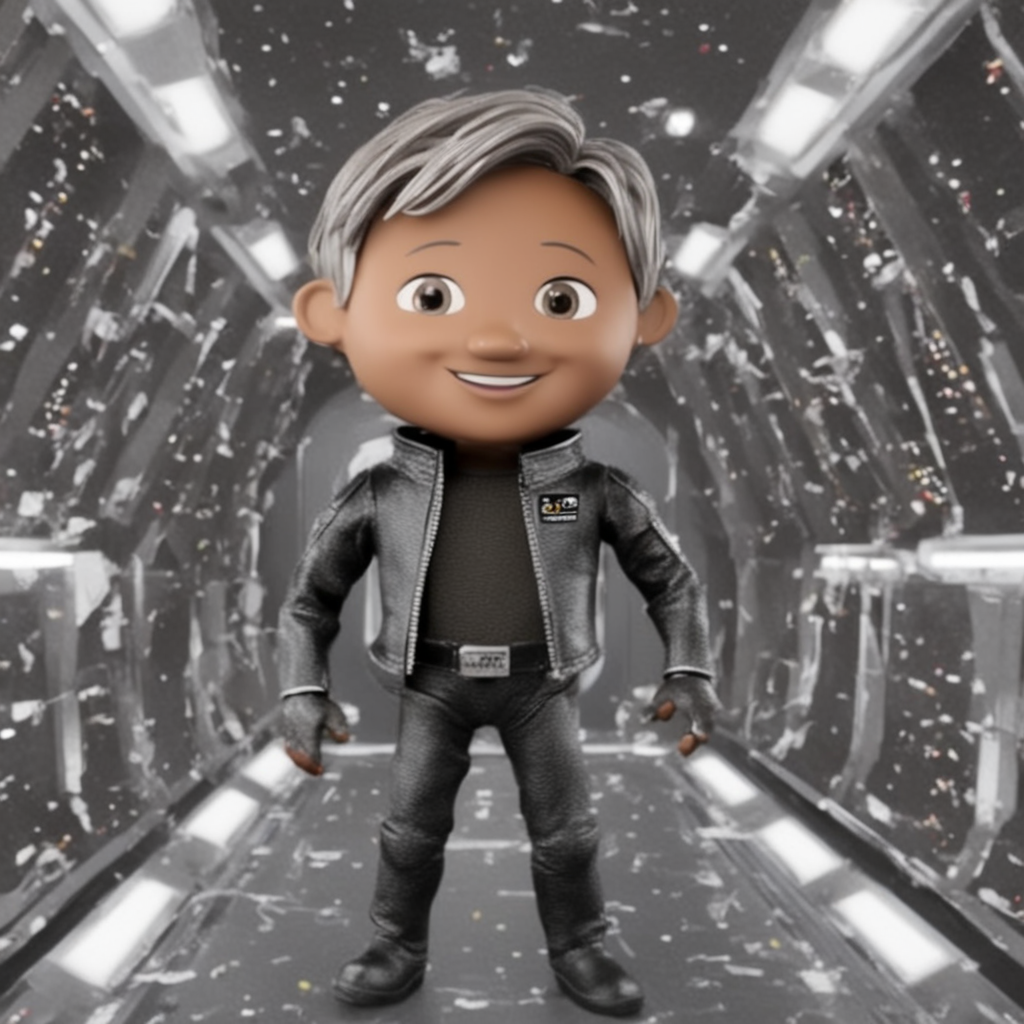

In [30]:
# Prepare the request data for fetching the image
data = {
  "instances": [
    {
      "prompt": "A picture of toy jensen in space",
      "num_inference_steps": 75
    }
  ]
}

# Send a request to your server
response = requests.post(predict_endpoint, json=data, verify=False)

# Get the Base64-encoded image string from the response
img_str = response.json()["predictions"][0]["image"]["b64"]

if img_str:
    # Decode the Base64 string to bytes
    img_bytes = base64.b64decode(img_str)

    # Convert bytes data to PIL Image
    img = Image.open(BytesIO(img_bytes))

img